In [4]:
import numpy as np
import matplotlib.pyplot as plt
import lingam
import graphviz

# VAR-LiNGAM

In [5]:
t = np.arange(1, 101)
x = t/10 + np.random.normal(size=len(t))
y = x + np.random.normal(size=len(t))

<function matplotlib.pyplot.show(close=None, block=None)>

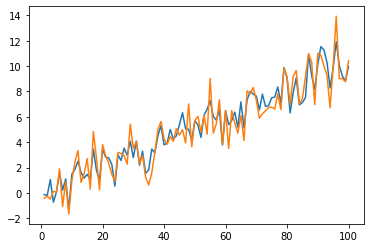

In [6]:
plt.plot(t, x)
plt.plot(t, y)
plt.show

In [7]:
data = np.array([[x],[y]]).reshape(100, 2)

model = lingam.VARLiNGAM()
model.fit(data)

In [8]:
print(model.causal_order_)

[1, 0]


In [9]:
print(model.adjacency_matrices_)

[[[0.         0.62711541]
  [0.         0.        ]]

 [[0.15758353 0.19125433]
  [0.52519425 0.45895499]]]


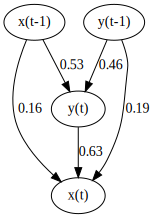

In [10]:
from lingam.utils import make_dot
labels = ['x(t)', 'y(t)', 'x(t-1)', 'y(t-1)']
make_dot(np.hstack(model.adjacency_matrices_), ignore_shape=True, lower_limit=0.05, labels=labels)

# LiNGAM

<function matplotlib.pyplot.show(close=None, block=None)>

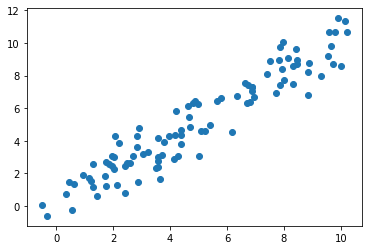

In [11]:
t = np.arange(1, 101)
x = t/10 + np.random.normal(size=len(t))
y = x + np.random.normal(size=len(t))
plt.scatter(x, y)
plt.show

In [12]:
data = np.array([[x],[y]]).reshape(100, 2)

## DirectLiNGAM

In [13]:
model = lingam.DirectLiNGAM()
model.fit(data)

print(model.causal_order_)

[1, 0]


In [14]:
print(model.adjacency_matrix_)

[[0.         0.94209515]
 [0.         0.        ]]


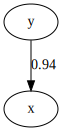

In [15]:
from lingam.utils import make_dot
labels = ['x', 'y']
make_dot(model.adjacency_matrix_, labels=labels)

In [16]:
# Total Effect
# x0 --> x1
te = model.estimate_total_effect(data, 0, 1)
print(f'total effect: {te:.3f}')

total effect: 0.000


In [17]:
te = model.estimate_total_effect(data, 1, 0)
print(f'total effect: {te:.3f}')

total effect: 0.942


## ICALiNGAM

In [18]:
model = lingam.ICALiNGAM()
model.fit(data)

print(model.causal_order_)

[0, 1]


In [19]:
print(model.adjacency_matrix_)

[[0.         0.        ]
 [0.78442999 0.        ]]


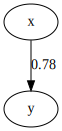

In [20]:
labels = ['x', 'y']
make_dot(model.adjacency_matrix_, labels=labels)

## 事前知識を入れる
・prior_knowledge引数を使う  
・DirectLiNGAMでしか事前知識は渡せない  
・ref: https://lingam.readthedocs.io/en/latest/tutorial/prior_knowledge.html

In [77]:
from lingam.utils import make_prior_knowledge
prior_knowledge = make_prior_knowledge(
    n_variables=4,
    no_paths=[[0, 1], [1, 2], [1, 0], [2, 1]])
print(prior_knowledge)

[[ 0  0 -1 -1]
 [ 0  0  0 -1]
 [-1  0  0 -1]
 [-1 -1 -1  0]]


In [63]:
t = np.arange(1, 101)
x0 = t/10 + np.random.normal(size=len(t))
x1 = t/10 + np.random.normal(size=len(t))
x2 = t/10 + np.random.normal(size=len(t))
x3 = t/10 + np.random.normal(size=len(t))

data = np.array([[x0],[x1],[x2],[x3]]).reshape(100, 4)

In [73]:
model = lingam.DirectLiNGAM(prior_knowledge=prior_knowledge)
model.fit(data)

print(model.causal_order_)

[1, 0, 2, 3]


In [74]:
print(model.adjacency_matrix_)

[[0.         0.89696661 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.4845185  0.42269563 0.         0.        ]
 [0.5562983  0.18039609 0.23017096 0.        ]]


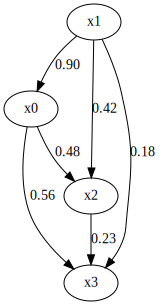

In [75]:
labels = ['x0', 'x1', 'x2', 'x3']
make_dot(model.adjacency_matrix_, labels=labels)

In [76]:
model._prior_knowledge

array([[ 0,  0, -1, -1],
       [ 0,  0,  0, -1],
       [-1,  0,  0, -1],
       [-1, -1, -1,  0]])